In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
iris_data = pd.read_csv('/Users/lazaregrail/Documents/QuickText/venv/Jupiter NoteBook/Iris.csv')
print("les données sur les feurs sont:")
print(iris_data)

les données sur les feurs sont:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [3]:
iris_data.dropna(inplace = True)
iris_data.drop_duplicates(inplace = True)

In [4]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


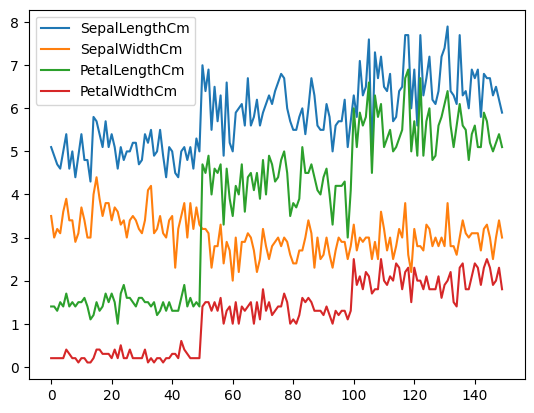

In [6]:
iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].plot()
plt.show()

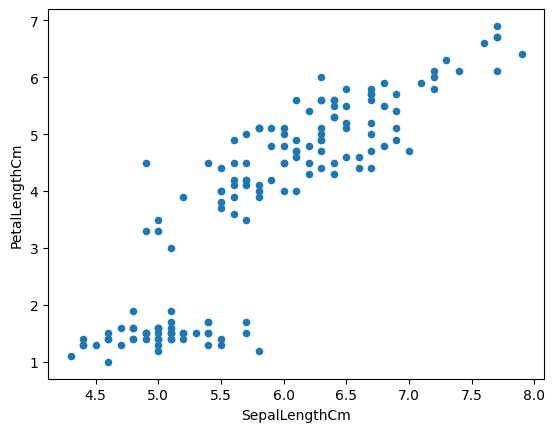

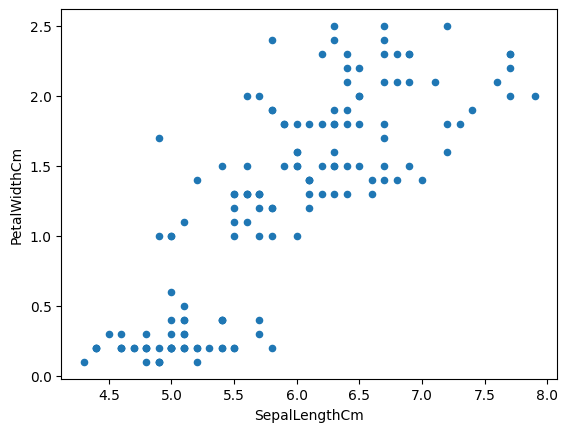

In [7]:
iris_data.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'PetalLengthCm')
iris_data.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'PetalWidthCm')
plt.show()

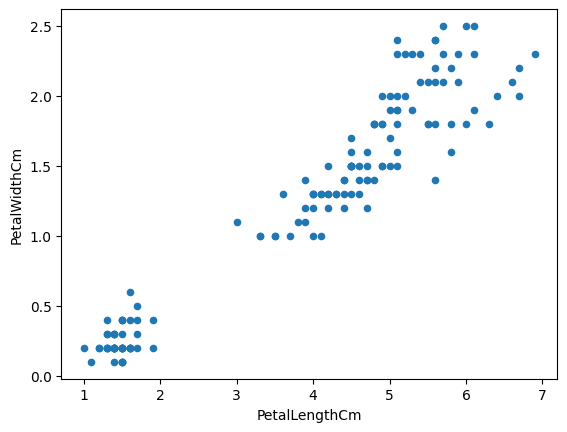

In [8]:
iris_data.plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm')
plt.show()

<Axes: ylabel='Frequency'>

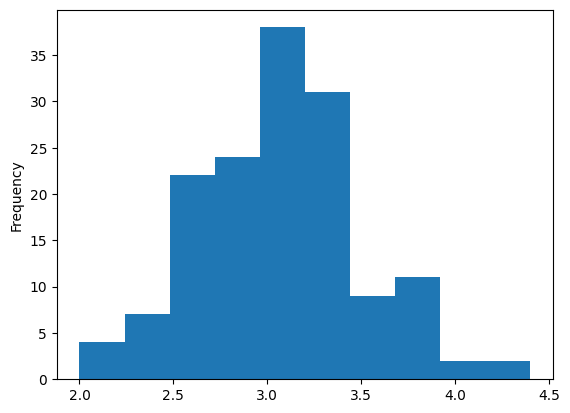

In [9]:
iris_data["SepalWidthCm"].plot(kind = 'hist')

In [10]:
print(iris_data[:3])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

In [12]:
X, y = load_iris(return_X_y=True)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor())
])

In [13]:
mod = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             cv=3)
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000827,3.716562e-04,0.000728,0.000126,1,{'model__n_neighbors': 1},0.0,0.0,0.0,0.0,0.0,1
1,0.000476,2.670312e-05,0.000470,0.000046,2,{'model__n_neighbors': 2},0.0,0.0,0.0,0.0,0.0,1
2,0.000452,5.260839e-06,0.000431,0.000004,3,{'model__n_neighbors': 3},0.0,0.0,0.0,0.0,0.0,1
3,0.000481,4.208716e-05,0.000497,0.000025,4,{'model__n_neighbors': 4},0.0,0.0,0.0,0.0,0.0,1
4,0.000452,1.620935e-06,0.000438,0.000004,5,{'model__n_neighbors': 5},0.0,0.0,0.0,0.0,0.0,1
5,0.000444,3.309355e-06,0.000440,0.000006,6,{'model__n_neighbors': 6},0.0,0.0,0.0,0.0,0.0,1
6,0.000444,4.495664e-07,0.000435,0.000005,7,{'model__n_neighbors': 7},0.0,0.0,0.0,0.0,0.0,1
7,0.000442,7.867412e-07,0.000440,0.000003,8,{'model__n_neighbors': 8},0.0,0.0,0.0,0.0,0.0,1
8,0.000440,3.339752e-06,0.000438,0.000005,9,{'model__n_neighbors': 9},0.0,0.0,0.0,0.0,0.0,1
9,0.000439,2.170642e-06,0.000442,0.000003,10,{'model__n_neighbors': 10},0.0,0.0,0.0,0.0,0.0,1


In [14]:
pipe.fit(X,y)
pred = pipe.predict(X)
print(pred)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
 1.2 1.  1.2 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.2 1.  1.6 1.
 1.6 1.  1.  1.  1.  1.4 1.  1.  1.  1.  1.  1.8 1.  1.  1.  1.2 1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  1.8 2.  2.  2.  2.  1.2 2.
 1.8 2.  2.  2.  2.  2.  2.  2.  1.8 2.  2.  1.2 2.  2.  2.  1.8 2.  2.
 1.8 2.  2.  2.  2.  2.  2.  1.4 1.4 2.  2.  2.  1.6 2.  2.  2.  1.8 2.
 2.  2.  1.8 2.  2.  1.6]


In [15]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


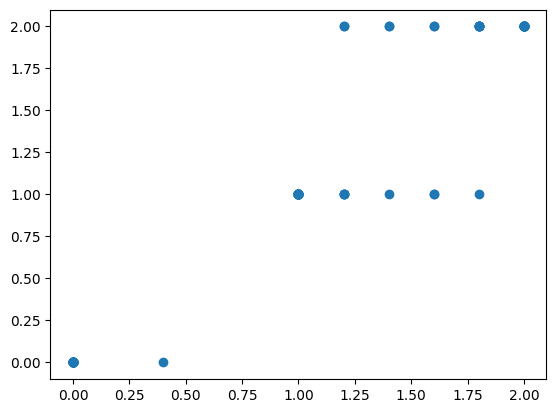

In [16]:
plt.scatter(pred,y)

In [17]:
X_iris = iris_data.drop(columns=["Species"])
X_iris = X_iris.drop(columns=["Id"])
print(X_iris)
y_iris = iris_data["Species"]
print(y_iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [18]:
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

rng = np.random.default_rng()

names = [
    "Nearest Neighbors",
    "Poly SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="poly", degree=4, coef0=1, C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

modeles = []

linearly_separable = (X_iris, y_iris)

datasets = [
    linearly_separable,
]

score_result = [0] * len(names)
#load_iris(return_X_y=True)
std_devs = np.std(X_iris, axis=0)

nb_noisy_dataset = 10
for i in range(nb_noisy_dataset-1):
    
    noise = rng.uniform(0, 0.5 * std_devs, size=X_iris.shape)

    X_noisy = X_iris + noise

    datasets.append((X_noisy, y_iris))


#figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    #if i == 1:
        #print("My data iris:","\n")
    #else:
        #print("\n","Noisy data iris n°",i-1,": \n")
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    #x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    #y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    #cm = plt.cm.RdBu
    #cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    #if ds_cnt == 0:
    #    ax.set_title("Input data")
    # Plot the training points
    #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    #ax.scatter(
    #    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    #)
    #ax.set_xlim(x_min, x_max)
    #ax.set_ylim(y_min, y_max)
    #ax.set_xticks(())
    #ax.set_yticks(())
    i += 1
    j=0
    # iterate over classifiers
    if i < 4:
        for name, clf in zip(names, classifiers):
            #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            #print(name,": ",score)
            score_result[j]+=score
            j+=1
            if i == 3:
                modeles.append(clf)
            #DecisionBoundaryDisplay.from_estimator(
            #    clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            #)
    
            # Plot the training points
            #ax.scatter(
            #    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
            #)
            # Plot the testing points
            #ax.scatter(
            #    X_test[:, 0],
            #    X_test[:, 1],
            #    c=y_test,
            #    cmap=cm_bright,
            #    edgecolors="k",
            #    alpha=0.6,
            #)
    
            #ax.set_xlim(x_min, x_max)
            #ax.set_ylim(y_min, y_max)
            #ax.set_xticks(())
            #ax.set_yticks(())
            #if ds_cnt == 0:
            #    ax.set_title(name)
            #ax.text(
            #    x_max - 0.3,
            #    y_min + 0.3
            #    ("%.2f" % score).lstrip("0"),
            #    size=15,
            #    horizontalalignment="right",
            #)
            #i += 1
    else:
        for name, clf in zip(names, modeles):
            #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            #print(name,": ",score)
            score_result[j]+=score
            modeles[j] = clf
            j+=1
            
            #DecisionBoundaryDisplay.from_estimator(
            #    clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            #)
    
            # Plot the training points
            #ax.scatter(
            #    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
            #)
            # Plot the testing points
            #ax.scatter(
            #    X_test[:, 0],
            #    X_test[:, 1],
            #    c=y_test,
            #    cmap=cm_bright,
            #    edgecolors="k",
            #    alpha=0.6,
            #)
    
            #ax.set_xlim(x_min, x_max)
            #ax.set_ylim(y_min, y_max)
            #ax.set_xticks(())
            #ax.set_yticks(())
            #if ds_cnt == 0:
            #    ax.set_title(name)
            #ax.text(
            #    x_max - 0.3,
            #    y_min + 0.3
            #    ("%.2f" % score).lstrip("0"),
            #    size=15,
            #    horizontalalignment="right",
            #)
            #i += 1
print("\n Total des scores par modèle:  \n \n",score_result)
score_result = [x / 10 for x in score_result]
print("\n Moyenne des score par modèle:  \n \n",score_result)
indices_top_4 = [index for index, value in sorted(enumerate(score_result), key=lambda x: x[1], reverse=True)[:4]]
print("\n Les 4 meilleurs Modèles sont:  \n \n",names[indices_top_4[0]],"\n",names[indices_top_4[1]],"\n",names[indices_top_4[2]],"\n",names[indices_top_4[3]],"\n")

for i in indices_top_4:
    filename = names[i] + "_model.sav"
    pickle.dump(modeles[i], open(filename, 'wb'))
#plt.tight_layout()
#plt.show()


 Total des scores par modèle:  
 
 [9.711111111111112, 9.466666666666667, 9.755555555555556, 9.866666666666667, 9.57777777777778, 9.733333333333334, 9.844444444444445, 9.644444444444446, 9.644444444444444, 9.8]

 Moyenne des score par modèle:  
 
 [0.9711111111111113, 0.9466666666666667, 0.9755555555555556, 0.9866666666666667, 0.957777777777778, 0.9733333333333334, 0.9844444444444445, 0.9644444444444445, 0.9644444444444444, 0.9800000000000001]

 Les 4 meilleurs Modèles sont:  
 
 Gaussian Process 
 Neural Net 
 QDA 
 RBF SVM 



In [19]:
#import lazypredict
#from lazypredict.Supervised import LazyClassifier

#X_train, X_test, y_train, y_test = train_test_split(linearly_separable[1], linearly_separable[2], test_size=0.5, random_state=123)

#clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
#models, predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)

In [20]:
download_modele = []
for i in indices_top_4:
    filename = names[i] + "_model.sav"
    download_modele.append(pickle.load(open(filename, 'rb')))
for i in range(len(download_modele)):
    result = clf.score(X_test, y_test)
    print("\n Le résultat des tests pour le modèle ",names[i],":  \n \n",result)


 Le résultat des tests pour le modèle  Nearest Neighbors :  
 
 0.9777777777777777

 Le résultat des tests pour le modèle  Poly SVM :  
 
 0.9777777777777777

 Le résultat des tests pour le modèle  RBF SVM :  
 
 0.9777777777777777

 Le résultat des tests pour le modèle  Gaussian Process :  
 
 0.9777777777777777


In [25]:
feature_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X_new = pd.DataFrame([[6.0, 3.3, 3.2, 2.0]], columns=feature_names)
pred = download_modele[0].predict(X_new)
print(pred)

['Iris-versicolor']
